In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip '/content/drive/MyDrive/Brain-tumor-classification.zip' -d'/content/dataset'

Archive:  /content/drive/MyDrive/Brain-tumor-classification.zip
  inflating: /content/dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(20).jpg  

In [11]:
import os
data_dir = '/content/dataset/Testing'
print(os.listdir(data_dir))

['no_tumor', 'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor']


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # common input size for VGG and ResNet
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 316 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [13]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

num_classes = len(train_generator.class_indices)

def create_model(base_model):
    base_model.trainable = False  # freeze pretrained layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# VGG16
vgg_model = create_model(VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)))

# ResNet50
resnet_model = create_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
# VGG16
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# ResNet50
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 220s 22s/step - accuracy: 0.2327 - loss: 1.4332 - val_accuracy: 0.3333 - val_loss: 1.3363
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 211s 22s/step - accuracy: 0.4209 - loss: 1.2837 - val_accuracy: 0.4103 - val_loss: 1.3067
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 215s 22s/step - accuracy: 0.4773 - loss: 1.2500 - val_accuracy: 0.4744 - val_loss: 1.2602
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 211s 21s/step - accuracy: 0.5053 - loss: 1.1887 - val_accuracy: 0.4103 - val_loss: 1.2495
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 210s 21s/step - accuracy: 0.5130 - loss: 1.1682 - val_accuracy: 0.4487 - val_loss: 1.2228
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 249s 26s/step - accuracy: 0.6226 - loss: 1.0826 - val_accuracy: 0.5513 - val_loss: 1.1966
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 248s 26s/step - accuracy: 0.6102 - loss: 1.0727 - val_accuracy: 0.5128 - val_loss: 1.1626
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 254s 27s/step - accuracy: 0.5802 - loss: 1.0121 - val_accuracy: 0.

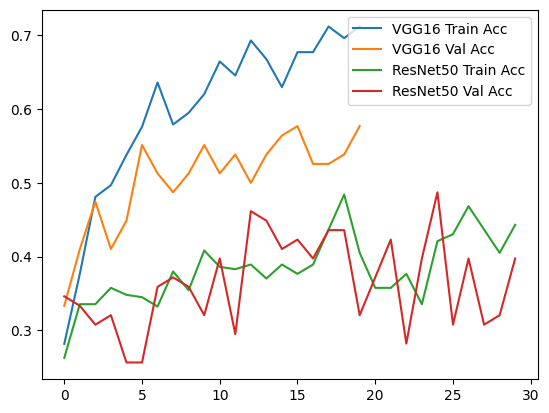

In [15]:
import matplotlib.pyplot as plt

plt.plot(history_vgg.history['accuracy'], label='VGG16 Train Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc')
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Train Acc')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val Acc')
plt.legend()
plt.show()

In [16]:
# VGG16
loss_vgg, acc_vgg = vgg_model.evaluate(val_generator)
print("VGG16 - Loss:", loss_vgg, "Accuracy:", acc_vgg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step - accuracy: 0.5295 - loss: 1.0711
VGG16 - Loss: 1.0224906206130981 Accuracy: 0.5512820482254028


In [17]:
# ResNet50
loss_resnet, acc_resnet = resnet_model.evaluate(val_generator)
print("ResNet50 - Loss:", loss_resnet, "Accuracy:", acc_resnet)

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.3940 - loss: 1.2727
ResNet50 - Loss: 1.2976123094558716 Accuracy: 0.39743590354919434
